In [225]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [246]:
x=np.array([[2,5],[1,3],[4,6],[4,4],[7,5],[8,3],[8,7],[4,10],[9,7],[7,10],[9,6],[4,8],[10,10],[2,7]])
k=5

In [247]:
def random_choice(x,k):
    centroid=[]
    for i in range(k):
        centroid.append(random.choice(x))
    centroid=np.array(centroid)
    return centroid

In [248]:
centroid=random_choice(x,k)

In [249]:
centroid

array([[4, 6],
       [8, 3],
       [4, 4],
       [9, 7],
       [2, 7]])

In [250]:
def centroid_std(x,centroid,k):
    g={}
    l=[]
    new_centroid=[]
    for i in range(len(x)):
        for j in range(k):
            l.append(np.sqrt((x[i][0]-centroid[j][0])**2+(x[i][1]-centroid[j][1])**2))
        index=np.argmin(l)
        l=[]
        temp=0
        for q,q2 in g.items():
            if q == index:
                q2=np.vstack((q2, x[i]))
                g[index]=q2
                temp=-1
                break
        if temp==0:
            g[index]=x[i]
            
    for i in range(k):
        if i not in g.keys():
            g[i]=centroid[i]
        
    std=[]
    for i,v in g.items():
        std.append(np.std(v))
    return std

In [251]:
def centroid_back(x,centroid,k):
    g={}
    l=[]
    new_centroid=[]
    for i in range(len(x)):
        for j in range(k):
            l.append(np.sqrt((x[i][0]-centroid[j][0])**2+(x[i][1]-centroid[j][1])**2))
        index=np.argmin(l)
        l=[]
        temp=0
        for q,q2 in g.items():
            if q == index:
                q2=np.vstack((q2, x[i]))
                g[index]=q2
                temp=-1
                break
        if temp==0:
            g[index]=x[i]
            
    for i in range(k):
        if i not in g.keys():
            g[i]=centroid[i]
    for i,v in sorted(g.items()):
        if np.ndim(v)==2:
            new_centroid.append(np.mean(v,axis=0))
        else:
            new_centroid.append(v)
     
    return np.array(new_centroid)

In [252]:
rng=1000
for i in range(rng):
    new_centroid=centroid_back(x,centroid,k)
    if str (centroid)==str(new_centroid):
        break
    else:
        centroid=new_centroid

In [253]:
print(centroid)

[[4.         7.        ]
 [7.5        4.        ]
 [2.33333333 4.        ]
 [8.6        8.        ]
 [3.         8.5       ]]


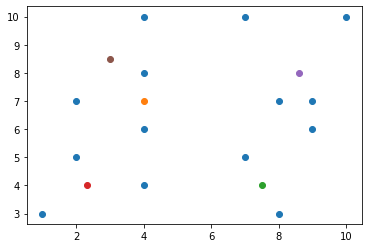

In [254]:
plt.scatter(x[:,0],x[:,1])

for i in range(k):
    plt.scatter(centroid[i][0],centroid[i][1])

plt.show()

In [255]:
std=centroid_std(x,centroid,k)

In [256]:
std

[1.3437096247164249,
 1.6583123951777,
 1.920286436967152,
 1.4177446878757827,
 3.031088913245535]

In [257]:
def euclidean(x, x2):
    sum=0
    for ix,ix2 in zip(x,x2):
        sum+=(ix-ix2)**2
    return np.sqrt(sum)

In [258]:
def feedforward(x,std,centroid,k):
    h=[]
    hh=[]
    for i in range(len(x)):
        for j in range(k):
            l=euclidean(x[i],centroid[j])
            q=np.exp(-(l/(2*(std[j])**2)))
            h.append(q)
        hh.append(np.array(h))
        h=[]
    hh=np.array(hh)
    return hh

In [259]:
hh=feedforward(x,std,centroid,k)

In [260]:
k

5

In [261]:
hh

array([[0.45691553, 0.3618974 , 0.86681665, 0.16473129, 0.82028927],
       [0.2504201 , 0.30248536, 0.79772712, 0.1040381 , 0.72724254],
       [0.75811281, 0.48049785, 0.70257323, 0.28714877, 0.86369542],
       [0.43571399, 0.52921334, 0.79772712, 0.21950218, 0.778122  ],
       [0.36844628, 0.81605061, 0.52354455, 0.42922624, 0.74882073],
       [0.2087718 , 0.81605061, 0.45829877, 0.28573105, 0.66729779],
       [0.33032036, 0.57523397, 0.41920472, 0.74819091, 0.75269892],
       [0.43571399, 0.28281863, 0.42983087, 0.28714877, 0.90654896],
       [0.2504201 , 0.54343959, 0.37110738, 0.76497001, 0.71420871],
       [0.30885446, 0.33464319, 0.3567689 , 0.52880962, 0.79255776],
       [0.24364667, 0.63473642, 0.38916319, 0.6020799 , 0.70205643],
       [0.75811281, 0.38045899, 0.55567559, 0.31845357, 0.94096871],
       [0.15603788, 0.30672056, 0.26712125, 0.54482463, 0.67732736],
       [0.57473503, 0.32011094, 0.6641263 , 0.19003837, 0.90654896]])

In [262]:
bias=np.random.rand(len(x))
w=[]
for i in range(len(x)):
    w.append(np.random.rand(k))
w=np.array(w)

In [263]:
def predict(hh,bias,w):
    predict=[]
    for i in range(len(x)):
        z=np.dot(hh[i],w[i])
        z=z+bias[i]
        predict.append(z)
    return predict

In [264]:
predict=predict(hh,bias,w)

In [265]:
predict

[1.3086787990135138,
 1.0776013414317571,
 2.527185354828402,
 1.907277104719963,
 1.6160734134137864,
 1.2779286942465642,
 1.958222176806228,
 1.5573950038460134,
 1.4377608263518593,
 1.6832646117338514,
 2.4622119751854568,
 2.070038679248632,
 0.9267957268319938,
 1.5235604071511624]